In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df=pd.read_csv('/Users/avinashmagar/Documents/DataScience/python/Dataset/russian_car_datasets/train.csv')
df

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000
51631,51632,M004KA161,2025-01-31 00:00:00,1600000
51632,51633,E888EB199,2025-02-06 00:00:00,850000
51633,51634,X023XK77,2024-04-24 11:30:07,150000


In [37]:
df.shape

(51635, 4)

In [38]:
df.describe()

,id,price
count,51635.000000,5.163500e+04
mean,25818.000000,4.532253e+05
std,14905.884912,1.793287e+06
min,1.000000,2.000000e+04
25%,12909.500000,7.000000e+04
50%,25818.000000,1.500000e+05
75%,38726.500000,3.600000e+05
max,51635.000000,1.000000e+08


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   date    51635 non-null  object
 3   price   51635 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [40]:
df= df.drop(['date'], axis=1)

In [41]:
df.isnull().sum()

id       0
plate    0
price    0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

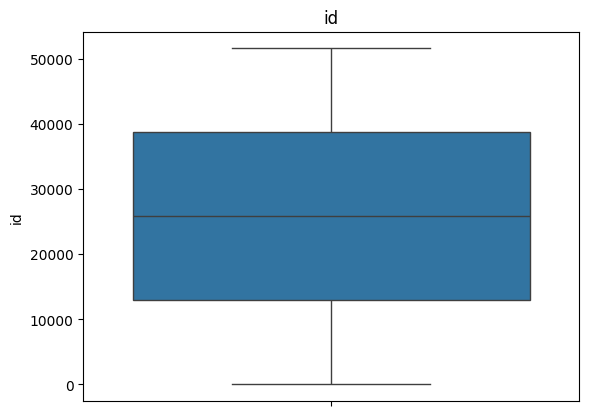

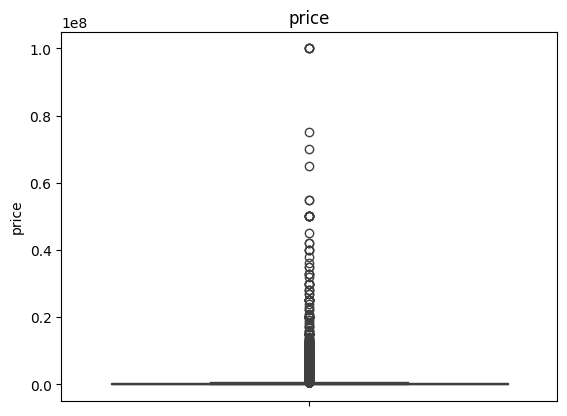

In [43]:
#cheking outliers at once
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [44]:
quantile1=df['Unemployment'].quantile(0.25)
quantile3=df['Unemployment'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Unemployment']=df['Unemployment'].clip(upperl,lowerl)
upperl,lowerl

KeyError: 'Unemployment'

In [ ]:
sns.boxplot(df['Unemployment'])
plt.show()

In [ ]:
quantile1=df['Temperature'].quantile(0.25)
quantile3=df['Temperature'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Temperature']=df['Temperature'].clip(upperl,lowerl)
upperl,lowerl

In [ ]:
sns.boxplot(df['Temperature'])
plt.show()

In [ ]:
quantile1=df['Holiday_Flag'].quantile(0.25)
quantile3=df['Holiday_Flag'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Holiday_Flag']=df['Holiday_Flag'].clip(upperl,lowerl)
upperl,lowerl

In [ ]:
sns.boxplot(df['Holiday_Flag'])
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply standard scaling to numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled dataset
print(df.head())

         id      plate     price
0 -1.732017  X059CP797 -0.216490
1 -1.731950  Y800MH790 -0.196973
2 -1.731883   A212TX77 -0.091021
3 -1.731816  P001AY199  0.126459
4 -1.731749  P001AY199  0.165494


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Weekly_Sales', axis=1)
y=df['Weekly_Sales']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 42)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (41308, 2) (41308,)
Test set: (10327, 2) (10327,)


In [ ]:
model=LinearRegression()
model.fit(x_train, y_train)

y_pred= model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 score:", r2_score(y_test, y_pred))

ValueError: could not convert string to float: 'K007CC99'